In [14]:
import numpy as np
import cv2
from sklearn.utils import shuffle
import random
import matplotlib.pyplot as plt
import glob

In [15]:
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

In [16]:
# class_names = ["EMCI","LMCI","MCI","AD","CN"]
class_names = ["AD","CN"]
class_index=[0,1]
path=r"C:\Users\matrix\Desktop\Alzheimers-ADNI"

# class_names = ["MildDemented",
# "ModerateDemented",
#  "NonDemented",
# "VeryMildDemented"]
# class_index=[0,1,2,3]
# path=r"C:\Users\matrix\Desktop\Alzheimer_s Dataset"


In [17]:
'''reading the images'''
data=dict()
# trainData=[]
# trainDataLables=[]
coo_matrix=[]
for name in class_names:
    images = [cv2.imread(file,cv2.COLOR_BGR2GRAY) for file in glob.glob(path+"\\train\\"+name+r'\*.jpg')]
    coo_matrix.append({name:len(images)})
    temp=[]
    for i in images:
        i=cv2.resize(i,(128,128))
        temp.append(np.asarray(i))
    data[name]=temp

In [18]:
iData=[]
iDataLables=[]
index=0
for name in class_names:
    for i in data[name]:
        iData.append(i)
        iDataLables.append(index)
    index+=1

iData=np.array(iData)
iDataLables=np.asarray(iDataLables)
iData,iDataLables=shuffle(iData,iDataLables)


In [19]:
'''balancing imbalanced data'''
print('before')
print(coo_matrix)
max_count=0
for name in class_names:
    if len(data[name])>max_count:
        max_count=len(data[name])
print(max_count)

for name in class_names:
    n=len(data[name])
    for t in range(n,max_count):
        rnd=data[name][random.randint(0, n)]
        rtd=rotate_image(rnd,random.randint(-10,10))
        data[name].append(rtd)

coo_matrix=[]
for name in class_names:
    n=len(data[name])
    coo_matrix.append({name:n})

print('after')
print(coo_matrix)

before
[{'AD': 145}, {'CN': 486}]
486
after
[{'AD': 486}, {'CN': 486}]


In [20]:
trainData=[]
trainDataLables=[]
index=0
for name in class_names:
    for i in data[name]:
        trainData.append(i)
        trainDataLables.append(index)
    index+=1

trainData=np.array(trainData)
trainDataLables=np.asarray(trainDataLables)
trainData,trainDataLables=shuffle(trainData,trainDataLables)

In [21]:
data=dict()

for name in class_names:
    images = [cv2.imread(file,cv2.COLOR_BGR2GRAY) for file in glob.glob(path+"\\test\\"+name+r'\*.jpg')]
    coo_matrix.append({name:len(images)})
    temp=[]
    for i in images:
        i=cv2.resize(i,(128,128))
        temp.append(np.asarray(i))
    data[name]=temp

valData=[]
valDataLables=[]
index=0
for name in class_names:
    for i in data[name]:
        valData.append(i)
        valDataLables.append(index)
    index+=1

valData=np.array(valData)
valDataLables=np.asarray(valDataLables)
valData,valDataLables=shuffle(valData,valDataLables)

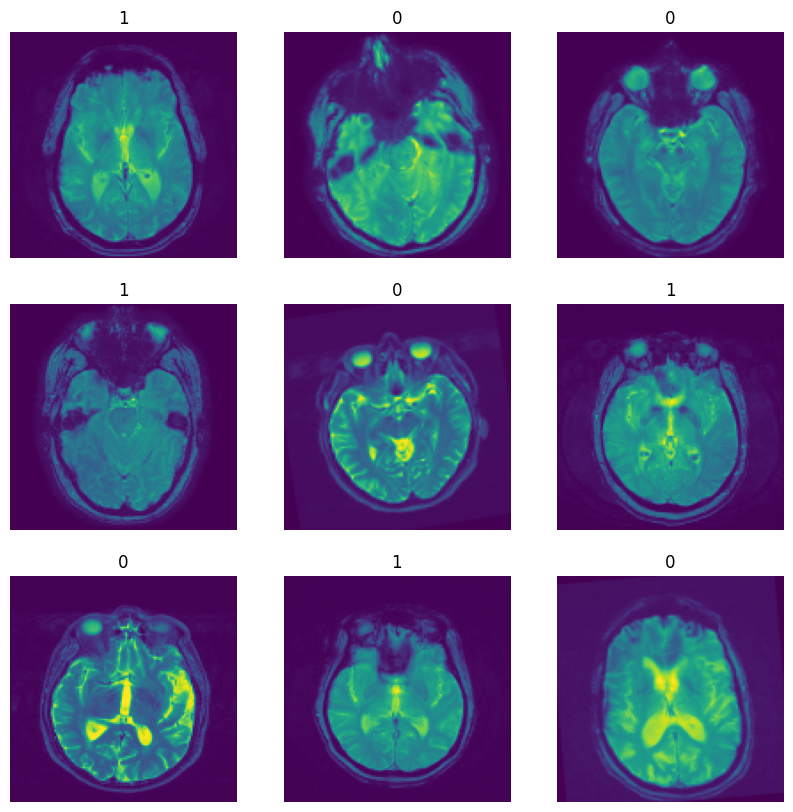

In [22]:
plt.figure(figsize=(10, 10))
i=0
for x in range(9):
    ax = plt.subplot(3, 3, i+1)
    i+=1
    plt.imshow(trainData[x].reshape(128, 128))
    plt.title(trainDataLables[x])
    plt.axis("off")
plt.show()

In [23]:
# temp=[]
# for i in trainData:
#     temp.append(cv2.GaussianBlur(i,(3,3),cv2.BORDER_DEFAULT))

# trainData=np.array(temp)

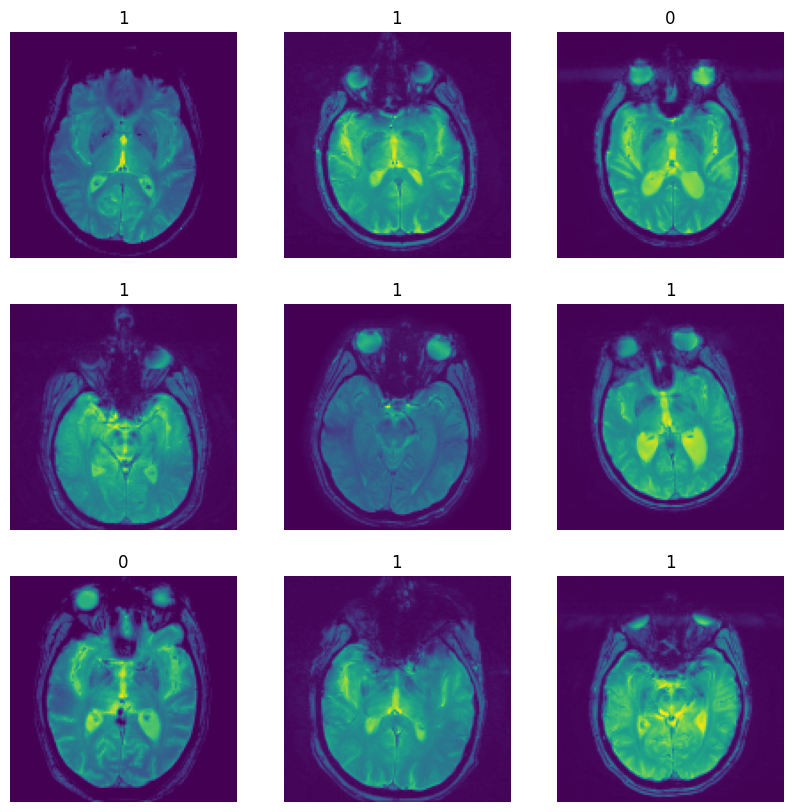

In [24]:
plt.figure(figsize=(10, 10))
i=0
for x in range(9):
    ax = plt.subplot(3, 3, i+1)
    i+=1
    plt.imshow(valData[x].reshape(128, 128))
    plt.title(valDataLables[x])
    plt.axis("off")
plt.show()

In [25]:
print(trainData.shape,
trainDataLables.shape,
valData.shape,
valDataLables.shape)

(972, 128, 128) (972,) (113, 128, 128) (113,)


In [26]:
import pickle
data = {"X":trainData,"y":trainDataLables,'X_val':valData,"y_val":valDataLables}
fileOpen=open(path+'/ADvsCN',"ab")
pickle.dump(data, fileOpen)                     
fileOpen.close()